In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
import pickle

In [67]:
with open("../saved-outputs/phi.pkl", "rb") as f:
        phi = pickle.load(f)

with open("../saved-outputs/rating_GroupForUser.pkl", "rb") as f:
        rating_GroupForUser = pickle.load(f)
        
with open("../saved-outputs/rating_GroupForMovie.pkl", "rb") as f:
        rating_GroupForMovie = pickle.load(f)
        
mu = np.load("../saved-outputs/mu.npy")
shp = np.load("../saved-outputs/shp.npy")
rte = np.load("../saved-outputs/rte.npy")

In [152]:
for i in range(25900):
    if sum(phi[1][3][i]) != 0:
        print(i, sum(phi[1][3][i]))

In [153]:
for i in range(1000,2000):
    print(sum(mu[i]))

### Generate Test Set

In [74]:
generator = np.random.RandomState(20)
permutation = generator.permutation(len(rating_GroupForUser))
test_size = 2000
c = 0
test_user_ids = []
for i in permutation:
    if len(rating_GroupForUser[i])>0:
        test_user_ids.append(i)
        c += 1
    if c == test_size:
        break
print(len(test_user_ids))

2000


### Compute Average Recalls and Precisions for Top-M

iteration: 90
iteration: 91
iteration: 92
iteration: 93
iteration: 94
iteration: 95
iteration: 96
iteration: 97
iteration: 98
iteration: 99
[0.0008146525096525104, 0.00081988416988417, 0.0008248841698841697, 0.0008299613899613899, 0.0008349613899613901, 0.0008397683397683395, 0.0008446138996139001, 0.0008498069498069507, 0.0008550386100386108, 0.0008601737451737457]


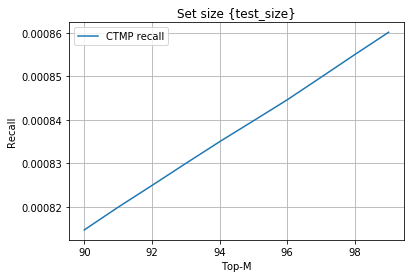

In [79]:
noncold_items = []
for movie_id in range(len(rating_GroupForMovie)):
     if len(rating_GroupForMovie[movie_id]) != 0:
            noncold_items.append(movie_id)

def recall_per_user(user_id, TOP_M, in_matrix):
    if in_matrix:
        _mu = mu[noncold_items,:]
    else:
        _mu = mu
    ratings = np.dot((shp[user_id]/rte[user_id]), _mu.T)
    predicted_top_M = np.argsort(-ratings)[:TOP_M]
    actual = rating_GroupForUser[user_id]
    recall = np.sum(np.in1d(predicted_top_M, actual)*1)/len(rating_GroupForUser[user_id])
    return recall


def average_recalls(top_start, top_end):
    r = []
    for top in range(top_start, top_end):
        print("iteration:",top)
        recall_sum = 0
        for usr in test_user_ids:
            recall_sum += recall_per_user(usr, top, in_matrix=False)
        avg_recall = recall_sum/test_size
        r.append(avg_recall)
    return r

def precision_per_user(user_id, TOP_M, in_matrix):
    if in_matrix:
        _mu = mu[noncold_items,:]
    else:
        _mu = mu
    ratings = np.dot((shp[user_id]/rte[user_id]), _mu.T)
    predicted_top_M = np.argsort(-ratings)[:TOP_M]
    actual = rating_GroupForUser[user_id]
    precision = np.sum(np.in1d(predicted_top_M, actual)*1)/25900
    return precision

def average_precisions(top_start, top_end):
    p = []
    for top in range(top_start, top_end):
        print("iteration:",top)
        precision_sum = 0
        for usr in test_user_ids:
            precision_sum += precision_per_user(usr, top, in_matrix=False)
        avg_precision = precision_sum/test_size
        p.append(avg_precision)
    return p



#avg_r = average_recalls(1,100)
avg_p = average_precisions(90,100)
print(avg_p)

"""PLOT THE GRAPH"""
fig, ax = plt.subplots()
ax.plot(range(90, 100), avg_p, label="CTMP recall") #, label='std10')
ax.set_xlabel('Top-M')
ax.set_ylabel('Recall')
ax.set_title("Set size {test_size}")
ax.legend()
plt.grid()
plt.show()
